<a href="https://colab.research.google.com/github/raksansuseendran/Project/blob/main/Cat2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [17]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [18]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


**Importing the Dependencies**

In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image 
from sklearn.model_selection import train_test_split

In [38]:
with_mask = os.listdir('/content/data/with_mask')
without_mask = os.listdir('/content/data/without_mask')

print(len(with_mask))
print(len(without_mask))

3725
3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [40]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [41]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [42]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [43]:
labels = with_mask_labels + without_mask_labels

print(len(labels))

7553


**Displaying the Images**

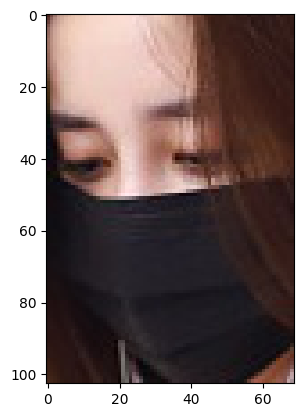

In [44]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1071.jpg')
imgplot = plt.imshow(img)
plt.show()

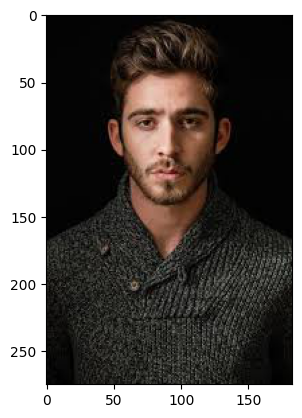

In [45]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_590.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [46]:
# convert images to numpy arrays

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [47]:
type(data)

list

In [48]:
len(data)

7553

In [49]:
data[0]

array([[[ 63,  57,  46],
        [ 52,  43,  35],
        [ 47,  37,  34],
        ...,
        [ 65,  56,  51],
        [ 66,  57,  52],
        [ 64,  55,  50]],

       [[ 56,  49,  40],
        [ 45,  38,  30],
        [ 44,  34,  31],
        ...,
        [ 62,  53,  48],
        [ 65,  56,  51],
        [ 66,  57,  52]],

       [[ 50,  43,  35],
        [ 44,  36,  30],
        [ 46,  36,  33],
        ...,
        [ 60,  51,  46],
        [ 63,  54,  49],
        [ 66,  57,  52]],

       ...,

       [[ 76, 152, 228],
        [ 82, 159, 234],
        [ 67, 144, 218],
        ...,
        [ 42,  99, 159],
        [ 41,  97, 156],
        [ 13,  66, 123]],

       [[ 74, 150, 226],
        [ 35, 113, 188],
        [ 13,  93, 167],
        ...,
        [ 42,  96, 155],
        [ 16,  69, 127],
        [  2,  51, 108]],

       [[ 48, 127, 204],
        [  7,  85, 161],
        [ 11,  90, 165],
        ...,
        [ 26,  76, 134],
        [  5,  54, 112],
        [  8,  55, 113]]

In [50]:
type(data[0])

numpy.ndarray

In [51]:
data[0].shape

(128, 128, 3)

In [52]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [53]:
type(X)

numpy.ndarray

In [54]:
type(Y)

numpy.ndarray

In [55]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


**Train Test Split**

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [57]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [58]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [59]:
X_train[0]

array([[[251, 251, 251],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [250, 250, 250],
        [250, 250, 250],
        [250, 250, 250]],

       [[251, 251, 251],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [250, 250, 250],
        [250, 250, 250],
        [250, 250, 250]],

       [[251, 251, 251],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [250, 250, 250],
        [250, 250, 250],
        [250, 250, 250]],

       ...,

       [[230, 230, 230],
        [227, 227, 227],
        [225, 225, 225],
        ...,
        [230, 230, 232],
        [230, 230, 232],
        [230, 230, 232]],

       [[230, 229, 229],
        [229, 228, 229],
        [228, 227, 228],
        ...,
        [232, 232, 234],
        [232, 232, 234],
        [232, 232, 234]],

       [[229, 227, 228],
        [230, 228, 229],
        [230, 228, 229],
        ...,
        [233, 233, 235],
        [233, 233, 235],
        [234, 234, 236]]

In [60]:
X_train_scaled[0]

array([[[0.98431373, 0.98431373, 0.98431373],
        [0.98431373, 0.98431373, 0.98431373],
        [0.98431373, 0.98431373, 0.98431373],
        ...,
        [0.98039216, 0.98039216, 0.98039216],
        [0.98039216, 0.98039216, 0.98039216],
        [0.98039216, 0.98039216, 0.98039216]],

       [[0.98431373, 0.98431373, 0.98431373],
        [0.98431373, 0.98431373, 0.98431373],
        [0.98431373, 0.98431373, 0.98431373],
        ...,
        [0.98039216, 0.98039216, 0.98039216],
        [0.98039216, 0.98039216, 0.98039216],
        [0.98039216, 0.98039216, 0.98039216]],

       [[0.98431373, 0.98431373, 0.98431373],
        [0.98431373, 0.98431373, 0.98431373],
        [0.98431373, 0.98431373, 0.98431373],
        ...,
        [0.98039216, 0.98039216, 0.98039216],
        [0.98039216, 0.98039216, 0.98039216],
        [0.98039216, 0.98039216, 0.98039216]],

       ...,

       [[0.90196078, 0.90196078, 0.90196078],
        [0.89019608, 0.89019608, 0.89019608],
        [0.88235294, 0

**Building a Convolutional Neural Networks (CNN)**

In [61]:
import tensorflow as tf
from tensorflow import keras

In [62]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [63]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [64]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 15s 23ms/step - loss: 0.4962 - acc: 0.7710 - val_loss: 0.2805 - val_acc: 0.8810
Epoch 2/5
170/170 [==============================] - 3s 16ms/step - loss: 0.3189 - acc: 0.8725 - val_loss: 0.2293 - val_acc: 0.9058
Epoch 3/5
170/170 [==============================] - 3s 16ms/step - loss: 0.2582 - acc: 0.8998 - val_loss: 0.2089 - val_acc: 0.9157
Epoch 4/5
170/170 [==============================] - 3s 15ms/step - loss: 0.2261 - acc: 0.9086 - val_loss: 0.2398 - val_acc: 0.9041
Epoch 5/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1964 - acc: 0.9220 - val_loss: 0.2339 - val_acc: 0.9240


**Model Evaluation**

In [65]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 0s 10ms/step - loss: 0.2054 - acc: 0.9226
Test Accuracy = 0.9225678443908691


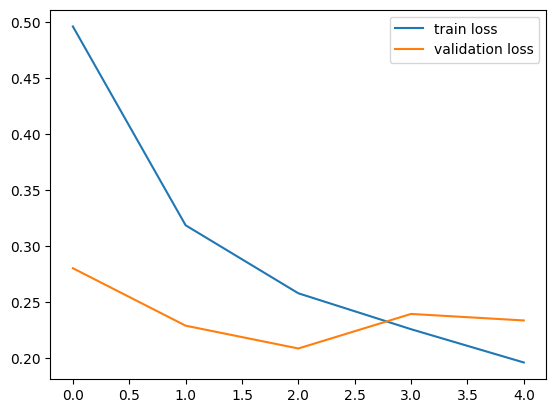

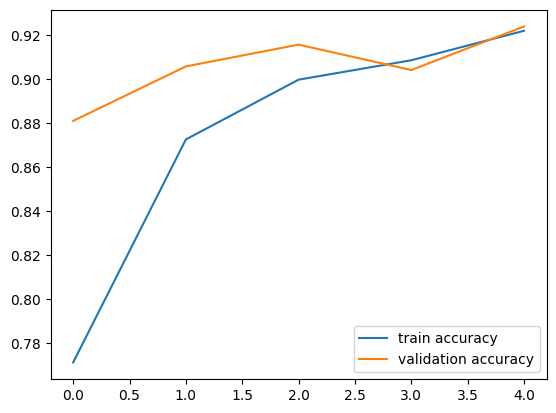

In [66]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/test_with_mask.jpg


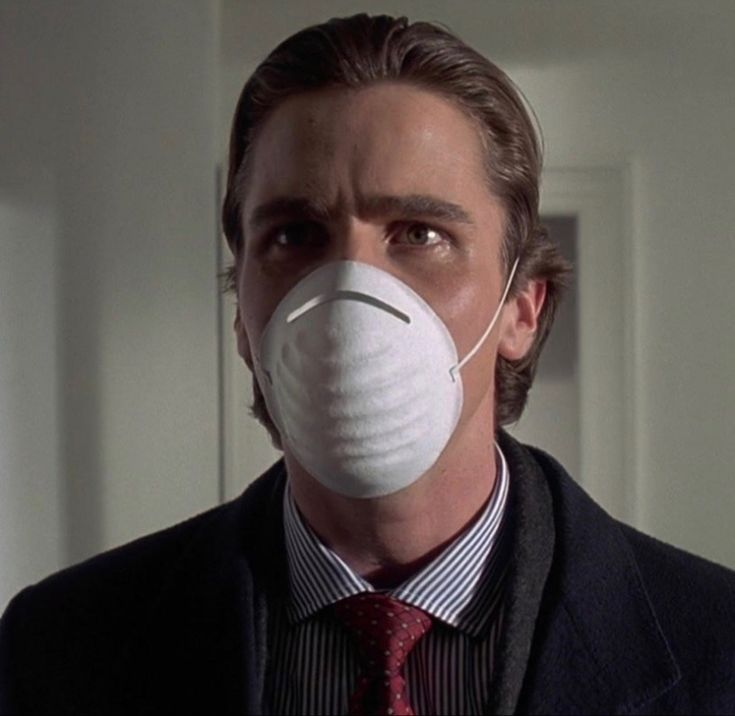

1/1 [==============================] - 0s 198ms/step
[[0.4242978  0.71268654]]
1
The person in the image is wearing a mask


In [67]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

In [69]:
# from sklearn.ensemble import IsolationForest

# # Convert images to numpy arrays
# with_mask_path = '/content/data/with_mask/'
# without_mask_path = '/content/data/without_mask/'

# with_mask = os.listdir(with_mask_path)
# without_mask = os.listdir(without_mask_path)

# data = []
# for img_file in with_mask:
#   image = Image.open(with_mask_path + img_file)
#   image = image.resize((128,128))
#   image = image.convert('RGB')
#   image = np.array(image)
#   if np.mean(image) > 50: # Only include images with mean pixel value > 50
#     data.append(image)

# for img_file in without_mask:
#   image = Image.open(without_mask_path + img_file)
#   image = image.resize((128,128))
#   image = image.convert('RGB')
#   image = np.array(image)
#   if np.mean(image) > 50: # Only include images with mean pixel value > 50
#     data.append(image)

# data = np.array(data)

# # Flatten images
# data = data.reshape(data.shape[0], -1)

# # Train Isolation Forest
# clf = IsolationForest(random_state=42)
# clf.fit(data)

# # Predict outliers
# outliers = clf.predict(data)

# # Print indices of dark image outliers
# for i in range(len(outliers)):
#   if outliers[i] == -1: # -1 means outlier
#     image_path = with_mask_path + with_mask[i] if i < len(with_mask) else without_mask_path + without_mask[i-len(with_mask)]
#     image = Image.open(image_path)
#     image.show()
